# Data Preprocessing

### Import packages and functions

In [1]:
!pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 462 kB 8.0 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


In [2]:
!pip install xplique

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 8.3 MB/s 


In [3]:
!pip install scipy==1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.1.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.1.0 which is incompatible.
jaxlib 0.3.15+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
jax 0.3.17 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
aeppl 0.0.33 requires scipy>=1.4.0, but you have scipy 1.1.0 which is incompatible.


In [5]:
# Run encore si ça ce marche pas (tensorflow ne fonctionne pas du premier coup je ne sais pas pourquoi)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import sklearn
import tensorflow as tf
import cv2
import h5py


from skimage import io
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,InputLayer
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc ,confusion_matrix, classification_report
from keras.utils.vis_utils import plot_model
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from skimage import io
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from PIL import Image, ImageOps

# MPL
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# CNN

# InceptionV3
from tensorflow.keras.applications import InceptionV3

# VGG16
from keras.applications.vgg16 import VGG16

## Attention network
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model

tf.compat.v1.disable_eager_execution()


In [6]:
# Hashing
import hashlib
from scipy.misc import imread, imresize, imshow
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
import os

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
sns.set_palette("flare") #("husl")

### Visualize duplicated images

In order to see if there are any duplicates, we implement the hashing technique. 

Image hashing is the process of using an algorithm to assign a unique hash value to an image. Duplicate copies of the image all have the exact same hash value. 

In [10]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [11]:
directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/'
dataset_folders = ['test','train', 'val']
dir_labels = ['PNEUMONIA', 'NORMAL']

import hashlib, os
duplicates = []
files_list = []
hash_keys = dict()

for folder in dataset_folders:
    # Append path of each file in the directory to files list
      dir = os.path.join(directory,folder)
      for label in dir_labels:
        dir_label = os.path.join(dir, label)
        os.chdir(dir_label)
        files_list.extend(os.listdir('.'))
        for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
          if os.path.isfile(filename):
               with open(filename, 'rb') as f:
                   filehash = hashlib.md5(f.read()).hexdigest()
               if filehash not in hash_keys: 
                  hash_keys[filehash] = index
               else:
                    duplicates.append((index,hash_keys[filehash]))

In [12]:
print(len(files_list))

5856


In [13]:
duplicates

[(123, 38),
 (127, 112),
 (325, 208),
 (136, 116),
 (152, 141),
 (190, 111),
 (515, 332),
 (696, 550),
 (1248, 1233),
 (1625, 1603),
 (2157, 2128),
 (2190, 2071),
 (2219, 2120),
 (2234, 2227),
 (2613, 2557),
 (2639, 2626),
 (2641, 2436),
 (2836, 2770),
 (2847, 2770),
 (2872, 2656),
 (2876, 2817),
 (2955, 2921),
 (3322, 3055),
 (3378, 3337),
 (3501, 3321),
 (3636, 3590),
 (3712, 3524),
 (3716, 3598),
 (3785, 3763),
 (3823, 3763),
 (3869, 3777),
 (411, 410)]

In [14]:
print("Total number of duplicates:",len(duplicates))

Total number of duplicates: 32


To check if the algorithm worked correctly, we visualize exemples of duplicates:

3875
[(515, 332), (696, 550), (1248, 1233), (1625, 1603), (2157, 2128), (2190, 2071), (2219, 2120), (2234, 2227), (2613, 2557), (2639, 2626), (2641, 2436), (2836, 2770), (2847, 2770), (2872, 2656), (2876, 2817), (2955, 2921), (3322, 3055), (3378, 3337), (3501, 3321), (3636, 3590), (3712, 3524), (3716, 3598), (3785, 3763), (3823, 3763), (3869, 3777)]


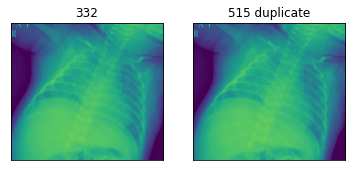

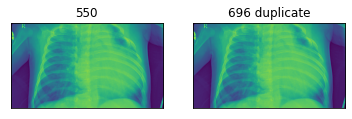

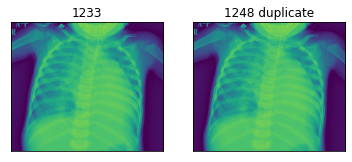

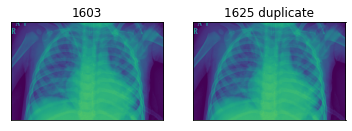

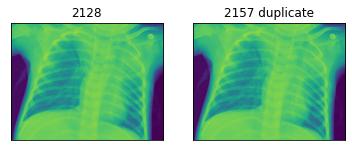

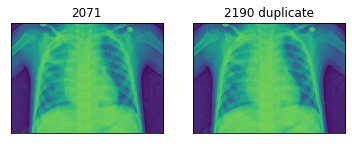

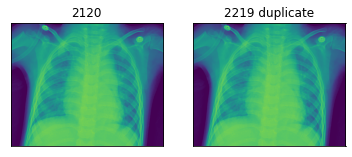

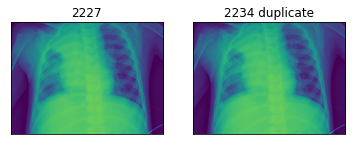

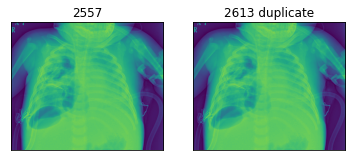

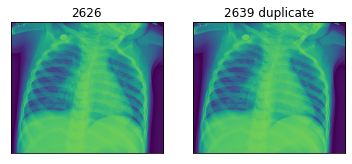

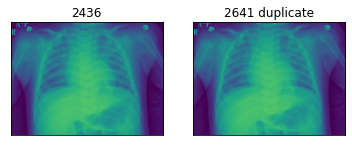

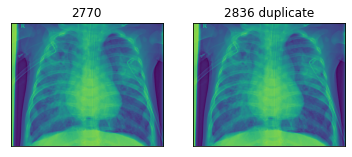

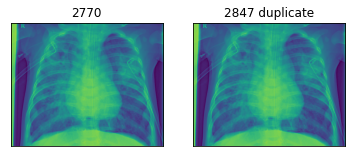

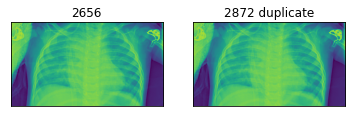

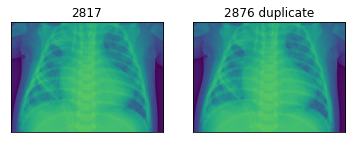

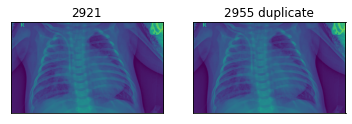

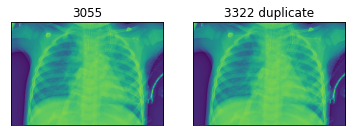

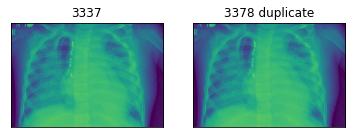

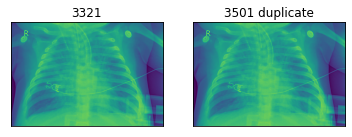

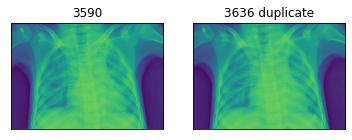

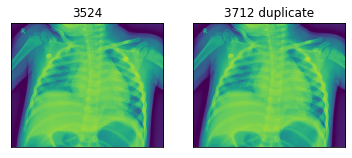

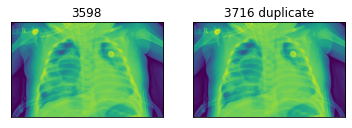

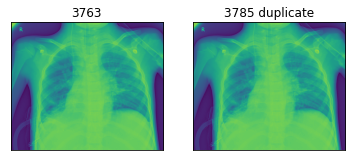

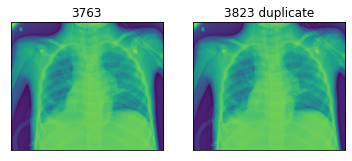

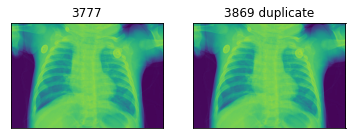

In [15]:
def file_hash(filename):
    with open(filename,'rb') as f:
        return md5(f.read()).hexdigest()
os.getcwd()
filename = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/train/PNEUMONIA'
os.chdir(filename)
os.getcwd()
files_list = os.listdir('.')
print (len(files_list))
duplicates=[]
hash_keys=dict()
for index, filename in enumerate(os.listdir('.')):
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys:
            hash_keys[filehash]=index
        else:
            duplicates.append((index,hash_keys[filehash]))
print(duplicates)
for file_indexes in duplicates[:30]:
    try:
        plt.subplot(121),plt.imshow(imread(files_list[file_indexes[1]]))
        plt.title(file_indexes[1]),plt.xticks([]),plt.yticks([])
        plt.subplot(122),plt.imshow(imread(files_list[file_indexes[0]]))
        plt.title(str(file_indexes[0])+ ' duplicate'),plt.xticks([]),plt.yticks([])
        plt.show()
    except OSError as e:
        continue

### Create clean dataframe

In [16]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [17]:
# Sort paths for viral vs. bacteria pneumonia images
directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/'
dataset_folders = ['test','train', 'val']
dir_labels = ['PNEUMONIA', 'NORMAL']

path = []

img_size = 224 # input size for VGG16, also good for InceptionV3

def get_training_data(data_dir) :
  data = []
  duplicates = []
  hash_keys = dict()

  for folder in dataset_folders:
    # Path for each file
      dir = os.path.join(directory,folder)
      for label in dir_labels:
        dir_label = os.path.join(dir, label)
        for img in os.listdir(dir_label):
            try:
                img_arr = cv2.imread(os.path.join(dir_label, img), cv2.IMREAD_GRAYSCALE) # Gray images
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Resize to 224, 224
                
                # For MLP
                #image_eq = cv2.equalizeHist(resized_arr)

                # For CNN
                backtorgb = cv2.cvtColor(resized_arr,cv2.COLOR_GRAY2RGB) # Convert to RGB
                r_image, g_image, b_image = cv2.split(backtorgb) # Split into 3 channels --> RGB
                r_image_eq = cv2.equalizeHist(r_image) # Equalize histogram to enhance contrast
                g_image_eq = cv2.equalizeHist(g_image)
                b_image_eq = cv2.equalizeHist(b_image)
                image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq)) # Merge 3 channels RGB

                # Hashing for each image to detect any duplicate
                with open(os.path.join(dir_label, img), 'rb') as f:
                      filehash = hashlib.md5(f.read()).hexdigest()

                if label == 'PNEUMONIA':
                    if 'virus' in img:
                        data.append([image_eq, filehash, 'Viral'])
                    if 'bacteria' in img:
                        data.append([image_eq, filehash, 'Bacterial'])
            except Exception as e:
                print(e)
  return np.array(data)    


In [18]:
all_data = get_training_data('../content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray')

In [19]:
all_data

array([[array([[[ 18,  18,  18],
                [ 18,  18,  18],
                [ 18,  18,  18],
                ...,
                [133, 133, 133],
                [ 20,  20,  20],
                [132, 132, 132]],

               [[ 18,  18,  18],
                [ 17,  17,  17],
                [ 19,  19,  19],
                ...,
                [108, 108, 108],
                [142, 142, 142],
                [145, 145, 145]],

               [[ 17,  17,  17],
                [ 17,  17,  17],
                [ 18,  18,  18],
                ...,
                [100, 100, 100],
                [131, 131, 131],
                [148, 148, 148]],

               ...,

               [[  0,   0,   0],
                [  0,   0,   0],
                [  0,   0,   0],
                ...,
                [  0,   0,   0],
                [  0,   0,   0],
                [  0,   0,   0]],

               [[  0,   0,   0],
                [  0,   0,   0],
                [  0,   0,   

In [20]:
raw_df = pd.DataFrame(all_data, columns = ['Image', 'Hash', 'Class'])

In [21]:
print(raw_df)

                                                  Image  \
0     [[[18, 18, 18], [18, 18, 18], [18, 18, 18], [1...   
1     [[[252, 252, 252], [249, 249, 249], [222, 222,...   
2     [[[41, 41, 41], [42, 42, 42], [44, 44, 44], [4...   
3     [[[0, 0, 0], [0, 0, 0], [5, 5, 5], [8, 8, 8], ...   
4     [[[204, 204, 204], [202, 202, 202], [60, 60, 6...   
...                                                 ...   
4268  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [9, 9, 9], ...   
4269  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
4270  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [19, 19, 19...   
4271  [[[23, 23, 23], [24, 24, 24], [24, 24, 24], [2...   
4272  [[[15, 15, 15], [16, 16, 16], [17, 17, 17], [1...   

                                  Hash      Class  
0     d529cabe7f79660a1c2028854491e4e2      Viral  
1     6da1d692a1a39ee18b644fc6633fc4de  Bacterial  
2     608d7ed2c16700a49d4253841cf63fbd  Bacterial  
3     520390708b8feb0f495ca8cd3ca09fd8  Bacterial  
4     243a49550bff1c19477f70cac

In [22]:
raw_df.dtypes

Image    object
Hash     object
Class    object
dtype: object

I look at the duplicate images by comparing the images of all the folders together, thanks to the "hashing" technique.

Image hashing is the process of using an algorithm to assign a unique hash value to an image. The duplicate copies of the image all have the exact same "hash" value. For this reason, it is sometimes referred to as a "digital fingerprint".

In [23]:
raw_df.duplicated(subset=['Hash'])

0       False
1       False
2       False
3       False
4       False
        ...  
4268    False
4269    False
4270    False
4271    False
4272    False
Length: 4273, dtype: bool

In [24]:
print('Number of duplicated images:', raw_df.duplicated(subset=['Hash']).sum())

Number of duplicated images: 28


In [25]:
df = raw_df.drop_duplicates(subset=['Hash'])

In [26]:
len(raw_df)

4273

In [27]:
len(df)

4245

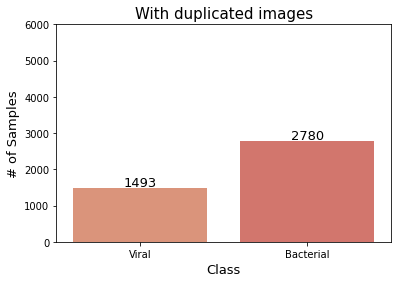

In [28]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=raw_df, order = ['Viral', 'Bacterial'])
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("With duplicated images", fontsize=15)
plt.ylim(0,6000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 13)
    
plt.show()

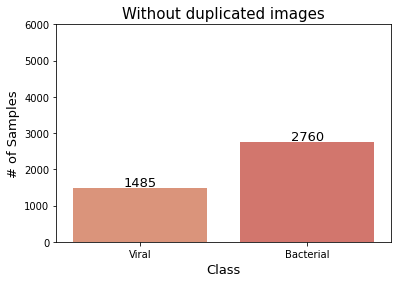

In [29]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=df, order = ['Viral', 'Bacterial'] )
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Without duplicated images", fontsize=15)

plt.ylim(0,6000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 13)
    
plt.show()

In [30]:
# I don't need 'Hash' anymore
df = df.drop('Hash', axis=1)

In [31]:
df

Image      Class
0     [[[18, 18, 18], [18, 18, 18], [18, 18, 18], [1...      Viral
1     [[[252, 252, 252], [249, 249, 249], [222, 222,...  Bacterial
2     [[[41, 41, 41], [42, 42, 42], [44, 44, 44], [4...  Bacterial
3     [[[0, 0, 0], [0, 0, 0], [5, 5, 5], [8, 8, 8], ...  Bacterial
4     [[[204, 204, 204], [202, 202, 202], [60, 60, 6...  Bacterial
...                                                 ...        ...
4268  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [9, 9, 9], ...  Bacterial
4269  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Bacterial
4270  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [19, 19, 19...  Bacterial
4271  [[[23, 23, 23], [24, 24, 24], [24, 24, 24], [2...  Bacterial
4272  [[[15, 15, 15], [16, 16, 16], [17, 17, 17], [1...  Bacterial

[4245 rows x 2 columns]

The number of samples is not balanced between our 3 classes. Since we have a large number of observations with the smallest class with 1485 observations, I decide to downsample the other majority classes.

In [32]:
# Downsample
class_2,class_1 = df['Class'] .value_counts()
cn = df[df['Class'] == 'Viral']
cb = df[df['Class'] == 'Bacterial']
df_2 = cb.sample(class_1)

In [33]:
undersampled_df = pd.concat([df_2,cn],axis=0)

In [34]:
undersampled_df['Class'].value_counts()

Bacterial    1485
Viral        1485
Name: Class, dtype: int64

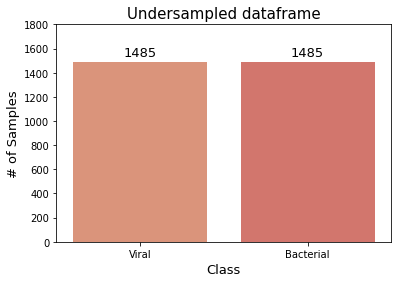

In [35]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=undersampled_df, order = ['Viral', 'Bacterial'] )
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Undersampled dataframe", fontsize=15)
plt.ylim(0,1800)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 13)
    
plt.show()

In [36]:
numpy_df = undersampled_df.to_numpy()

In [37]:
# I define X y 
x = []
y = []
for feature, label in numpy_df:
    x.append(feature)
    y.append(label)


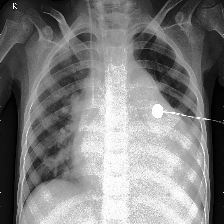

In [38]:
# I visualize the image to verifie the quality
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
for i in range(1):
    fig = px.imshow(x[i], color_continuous_scale='gray', title=y[i])
    fig.show()

# Image classification

To choose the output activation : https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

## Preprocessing

### Parameters

In [ ]:
nb_classes = 2 # For Viral, Bacterial
img_size = 224
nb_channels = 3 # For RBG

### Split dataset

In [39]:
# I split my data into 3 sets : train, validation and test 
  # Stratify allows us to balance our classes between sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=42, stratify = y_train)



In [40]:
# Normalization

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(f'X_train shape: {x_train.shape}')
print(f'X_val shape: {x_val.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'----------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'----------------------------------')
print(f'Number of training examples:  {len(x_train)}')
print(f'Number of validation examples: {len(x_val)}')
print(f'Number of testing examples:  {len(x_test)}')

X_train shape: (2138, 224, 224, 3)
X_val shape: (238, 224, 224, 3)
X_test shape: (594, 224, 224, 3)
----------------------------------
y_train shape: (2138,)
y_val shape: (238,)
y_test shape: (594,)
----------------------------------
Number of training examples:  2138
Number of validation examples: 238
Number of testing examples:  594


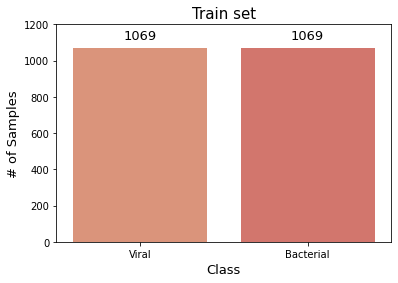

In [41]:
# Visualize Train set
plt.figure(figsize=(6,4))
ax = sns.countplot(x=y_train,  order = ['Viral', 'Bacterial'])
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Train set", fontsize= 15)
plt.ylim(0,1200)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 13)
    
plt.show()

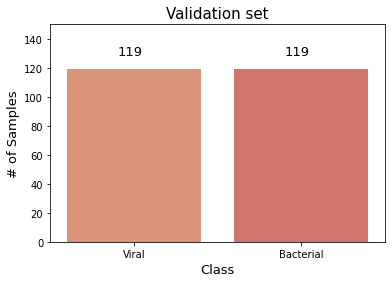

In [42]:
# Validation set
plt.figure(figsize=(6,4))
ax = sns.countplot(x=y_val,  order = ['Viral', 'Bacterial'] )
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Validation set", fontsize= 15)
plt.ylim(0,150)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+10), fontsize = 13)
    
plt.show()

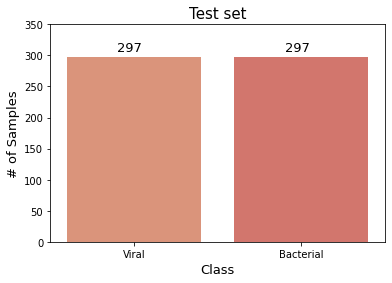

In [43]:
# Test set
plt.figure(figsize=(6,4))
ax = sns.countplot(x=y_test, order = ['Viral', 'Bacterial'])
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Test set", fontsize= 15)
plt.ylim(0,350)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+10), fontsize = 13)
    
plt.show()

### OneHotEncoder

One-hot encoding is a process by which categorical data (such as nominal data) are converted into numerical features of a dataset. This optimizes machine learning models.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Reshaping the dataset by adding a new axis
y_train = y_train[:,np.newaxis]
y_val = y_val[:,np.newaxis]
y_test = y_test[:,np.newaxis]

#Initialize onehot encoder
encode = OneHotEncoder(sparse=False)


#Encoding the images
y_train_encode = encode.fit_transform(y_train)
y_val_encode = encode.fit_transform(y_val)
y_test_encode = encode.transform(y_test)

#printing the shapes of the vectors 
print('Y_train: ' + str(y_train_encode.shape))
print('Y_val: ' + str(y_val_encode.shape))
print('Y_test:  '  + str(y_test_encode.shape))
print(encode.categories_)
print(encode.get_feature_names())



Y_train: (2138, 2)
Y_val: (238, 2)
Y_test:  (594, 2)
[array(['Bacterial', 'Viral'], dtype='<U9')]
['x0_Bacterial' 'x0_Viral']


### Callbacks

**EarlyStopping** is used to stop training once model performance stops improving on a set of validation data.
**ReduceLROnPlateau** allows to reduce the learning rate when a metric has stopped improving.
**ModelCheckpoint** allows to define where to check model weights, how to name the file and under what circumstances to create a model checkpoint.

The **val_categorical_accuracy** calculates the percentage accuracy of predicted values (yPred) that correspond to actual values (yTrue) for one-hot labels. It takes into account the validation set (and not the training set) to avoid overfitting

In [ ]:
#CallBacks Function
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
early_stop = EarlyStopping(monitor="val_loss",
                         patience=5,
                         mode="auto",)


epoch = 40 
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule(initial_lr=1e-4, decay_factor=0.75, step_size=2)



model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='auto', verbose=1, save_best_only=True)

callbacks=[early_stop, lr_sched, model_checkpoint]


### Clean variables

In [ ]:
del all_data
del raw_df
del df 
del undersampled_df
del y_train, y_val, y_test

# Multi Layers Perceptron (MLP)

### Input_dim = float32

MLP models require a vector format of inputs (1 single dimension). X must be converted to float32 format

In [ ]:
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('x_test shape:', x_test.shape)

x_train shape: (2138, 224, 224)
x_val shape: (238, 224, 224)
x_test shape: (594, 224, 224)


In [ ]:
x_train_fl = x_train.reshape(-1, img_size*img_size).astype('float32')
x_val_fl = x_val.reshape(-1, img_size*img_size).astype('float32')
x_test_fl = x_test.reshape(-1, img_size*img_size).astype('float32') 


In [ ]:
print('x_train float32 shape:', x_train_fl.shape)
print('x_val float32 shape:', x_val_fl.shape)
print('x_test float32 shape:', x_test_fl.shape)

print('y_train_encode shape:', y_train_encode.shape)
print('y_val_encode shape:', y_val_encode.shape)
print('y_test_encode shape:', y_test_encode.shape)

x_train float32 shape: (2138, 50176)
x_val float32 shape: (238, 50176)
x_test float32 shape: (594, 50176)
y_train_encode shape: (2138, 2)
y_val_encode shape: (238, 2)
y_test_encode shape: (594, 2)


## Sequential MLP

In [ ]:
input_dim = x_train_fl.shape[1]

In [ ]:
# Here's a Deep Dumb MLP (DDMLP)
mlp = Sequential()
mlp.add(Dense(128, input_dim=input_dim,activation='relu')) 
mlp.add(Dropout(0.15)) # Dropout for better generalization and avoid overfitting
mlp.add(Dense(128,activation='relu'))
mlp.add(Dropout(0.15))
mlp.add(Dense(nb_classes,activation='sigmoid')) # sigmoid for binary classification


In [ ]:
# Compute model parameters
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
mlp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

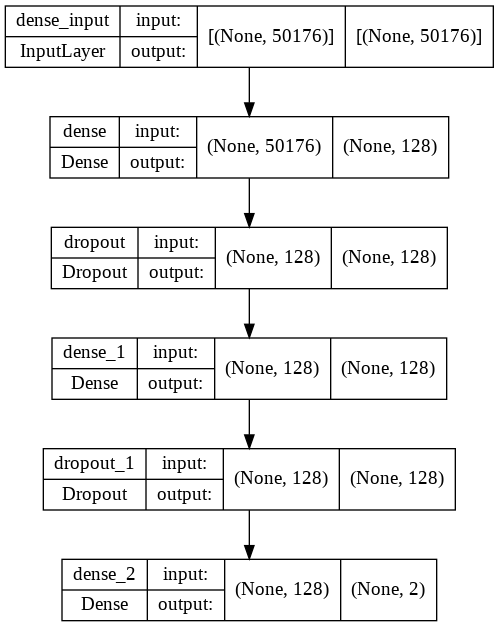

In [ ]:
# Visualize model
plot_model(mlp, to_file = 'mlp_model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# train the network
mlp_history = mlp.fit(x_train_fl, y_train_encode, validation_data = (x_train_fl, y_train_encode), epochs = 100, callbacks = callbacks)  #epochs=20, batch_size=10

Train on 2138 samples, validate on 2138 samples
Epoch 1/100
2048/2138 [===========================>..] - ETA: 0s - loss: 0.7262 - accuracy: 0.5686
Epoch 1: val_loss improved from inf to 0.63933, saving model to best_model.h5
2138/2138 [==============================] - 2s 784us/sample - loss: 0.7261 - accuracy: 0.5655 - val_loss: 0.6393 - val_accuracy: 0.6558 - lr: 1.0000e-04
Epoch 2/100
2048/2138 [===========================>..] - ETA: 0s - loss: 0.6230 - accuracy: 0.6475
Epoch 2: val_loss improved from 0.63933 to 0.58758, saving model to best_model.h5
2138/2138 [==============================] - 1s 409us/sample - loss: 0.6253 - accuracy: 0.6445 - val_loss: 0.5876 - val_accuracy: 0.7175 - lr: 1.0000e-04
Epoch 3/100
2080/2138 [============================>.] - ETA: 0s - loss: 0.6084 - accuracy: 0.6724
Epoch 3: val_loss improved from 0.58758 to 0.57793, saving model to best_model.h5
2138/2138 [==============================] - 1s 444us/sample - loss: 0.6088 - accuracy: 0.6717 - val_loss

In [ ]:
# Save the model
mlp.save('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary_pneu/mlp.h5') 

### Model performance

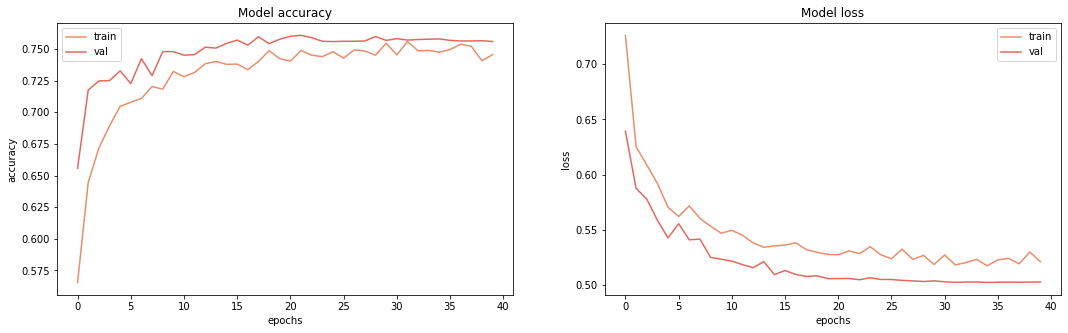

In [ ]:
# Learning curve based on categorical_accuracy and loss

figure, axis = plt.subplots(1, 2, figsize=(18,5))
axis = axis.ravel()

for i,element in enumerate(['accuracy', 'loss']):
    axis[i].plot(mlp_history.history[element])
    axis[i].plot(mlp_history.history['val_' + element])
    axis[i].set_title('Model {}'.format(element))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(element)
    axis[i].legend(['train', 'val'])

Train Result:
Accuracy Score: 75.68%
_______________________________________________
CLASSIFICATION REPORT:
             Bacterial        Viral  accuracy    macro avg  weighted avg
precision     0.735219     0.782698  0.756782     0.758958      0.758958
recall        0.802619     0.710945  0.756782     0.756782      0.756782
f1-score      0.767442     0.745098  0.756782     0.756270      0.756270
support    1069.000000  1069.000000  0.756782  2138.000000   2138.000000
_______________________________________________
Confusion Matrix: 
 [[858 211]
 [309 760]]

Test Result:
Accuracy Score: 74.75%
_______________________________________________
CLASSIFICATION REPORT:
            Bacterial       Viral  accuracy   macro avg  weighted avg
precision    0.737864    0.757895  0.747475    0.747879      0.747879
recall       0.767677    0.727273  0.747475    0.747475      0.747475
f1-score     0.752475    0.742268  0.747475    0.747372      0.747372
support    297.000000  297.000000  0.747475  594

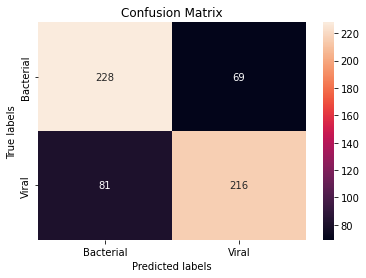

In [ ]:
# Print scores for Training and Testing sets

def print_score(mlp, x_train_fl, y_train_encode, x_test_fl, y_test_encode, train=True):
    if train:
        pred = mlp.predict(x_train_fl)
        pred = np.argmax(pred, axis=1)
        y_train_argmax = np.argmax(y_train_encode, axis=1)
        clf_report = pd.DataFrame(classification_report(y_train_argmax, pred, output_dict=True, target_names = ['Bacterial', 'Viral']))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_argmax, pred)}\n")
        
    elif train==False:
        pred = mlp.predict(x_test_fl)
        pred = np.argmax(pred, axis=1)
        y_test_argmax = np.argmax(y_test_encode, axis=1)
        cm = confusion_matrix(y_test_argmax, pred)
        clf_report = pd.DataFrame(classification_report(y_test_argmax, pred, output_dict=True, target_names = ['Bacterial', 'Viral']))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['Bacterial', 'Viral']); ax.yaxis.set_ticklabels(['Bacterial', 'Viral'])

print_score(mlp, x_train_fl, y_train_encode, x_test_fl, y_test_encode, train=True)
print_score(mlp, x_train_fl,y_train_encode, x_test_fl, y_test_encode, train=False)

In [ ]:
# Print scores for Validation set

pred = mlp.predict(x_val_fl)
pred = np.argmax(pred, axis=1)
y_val_argmax = np.argmax(y_val_encode, axis=1)
clf_report = pd.DataFrame(classification_report(y_val_argmax, pred, output_dict=True, target_names = ['Bacterial', 'Viral']))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_val_argmax, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_val_argmax, pred)}\n")

Validation Result:
Accuracy Score: 71.43%
_______________________________________________
CLASSIFICATION REPORT:
            Bacterial       Viral  accuracy   macro avg  weighted avg
precision    0.704000    0.725664  0.714286    0.714832      0.714832
recall       0.739496    0.689076  0.714286    0.714286      0.714286
f1-score     0.721311    0.706897  0.714286    0.714104      0.714104
support    119.000000  119.000000  0.714286  238.000000    238.000000
_______________________________________________
Confusion Matrix: 
 [[88 31]
 [37 82]]



### ROC Curve

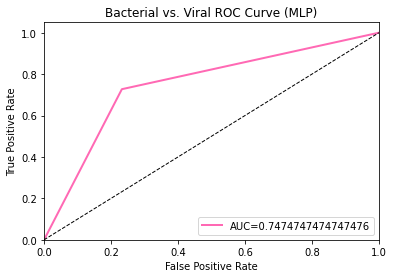

In [ ]:
from sklearn import metrics
y_pred = mlp.predict(x_test_fl)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test_encode, axis = 1)
fpr, tpr, _ = metrics.roc_curve(y_test_argmax,  y_pred)
auc = metrics.roc_auc_score(y_test_argmax, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc),lw = 2, color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bacterial vs. Viral ROC Curve (MLP)')
plt.legend(loc="lower right")
plt.show()

### Visualization of classification

In [ ]:
predict_prob=mlp.predict(x_test_fl)
predict_classes=np.argmax(predict_prob,axis=1)
y_test_argmax=np.argmax(y_test_encode,axis=1)

In [ ]:
correct = np.nonzero(predict_classes == y_test_argmax)[0]
incorrect = np.nonzero(predict_classes != y_test_argmax)[0]

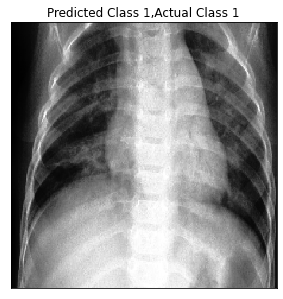

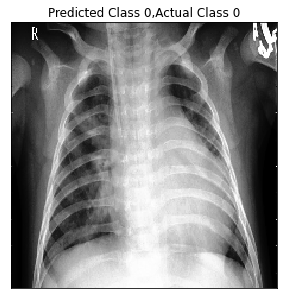

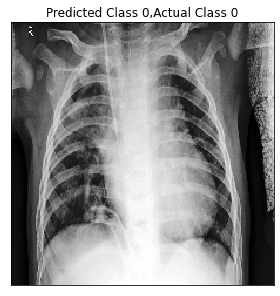

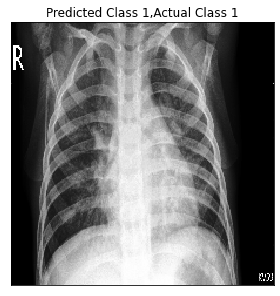

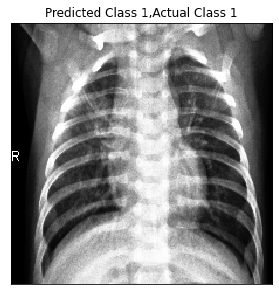

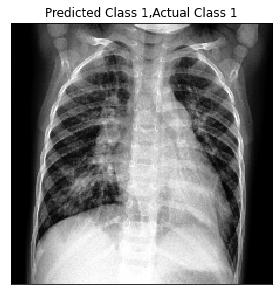

In [ ]:
# Correct classification

i = 0
for c in correct[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_fl[c].reshape(img_size,img_size), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Bacterial
# class 1 = Viral

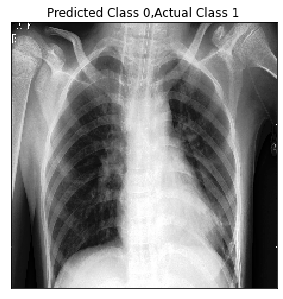

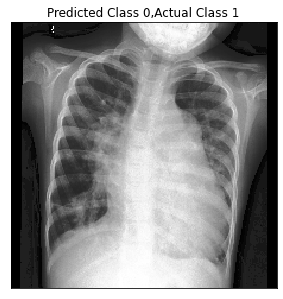

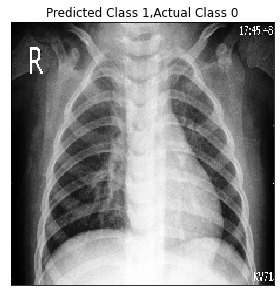

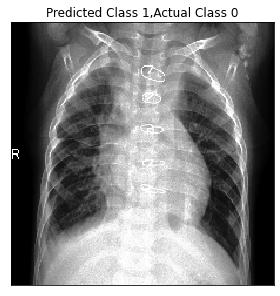

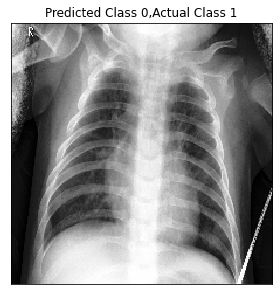

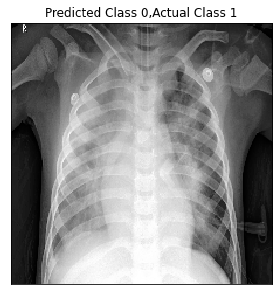

In [ ]:
# Incorrect classification

i = 0
for c in incorrect[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_fl[c].reshape(img_size,img_size), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Bacterial
# class 1 = Viral

# Convolutional Neural Network (CNN)

### Input_shape

CNN networks require 2-dimensional, 3-channel input_shape.

In [ ]:
#printing the shapes of the vectors 
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train_encode.shape))
print()
print('X_val: ' + str(x_val.shape))
print('Y_val: ' + str(y_val_encode.shape))
print()
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test_encode.shape))

X_train: (2273, 224, 224, 3)
Y_train: (2273, 2)

X_val: (253, 224, 224, 3)
Y_val: (253, 2)

X_test:  (632, 224, 224, 3)
Y_test:  (632, 2)



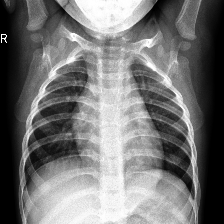

In [ ]:
# Check the quality of the image

for i in range(1):
    fig = px.imshow(x_train[i], color_continuous_scale='gray')
    fig.show()

## Sequential CNN

In [ ]:
# Implement CNN model from scratch

cnn = Sequential()

cnn.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (img_size, img_size, nb_channels), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size = (2, 2)))

cnn.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size = (2, 2)))

cnn.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size = (2, 2)))

cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.2)) # for better generalization and to avoid overfitting

cnn.add(Dense(nb_classes, activation = 'sigmoid')) # sigmoid for binary classification

# Define parameters
cnn.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


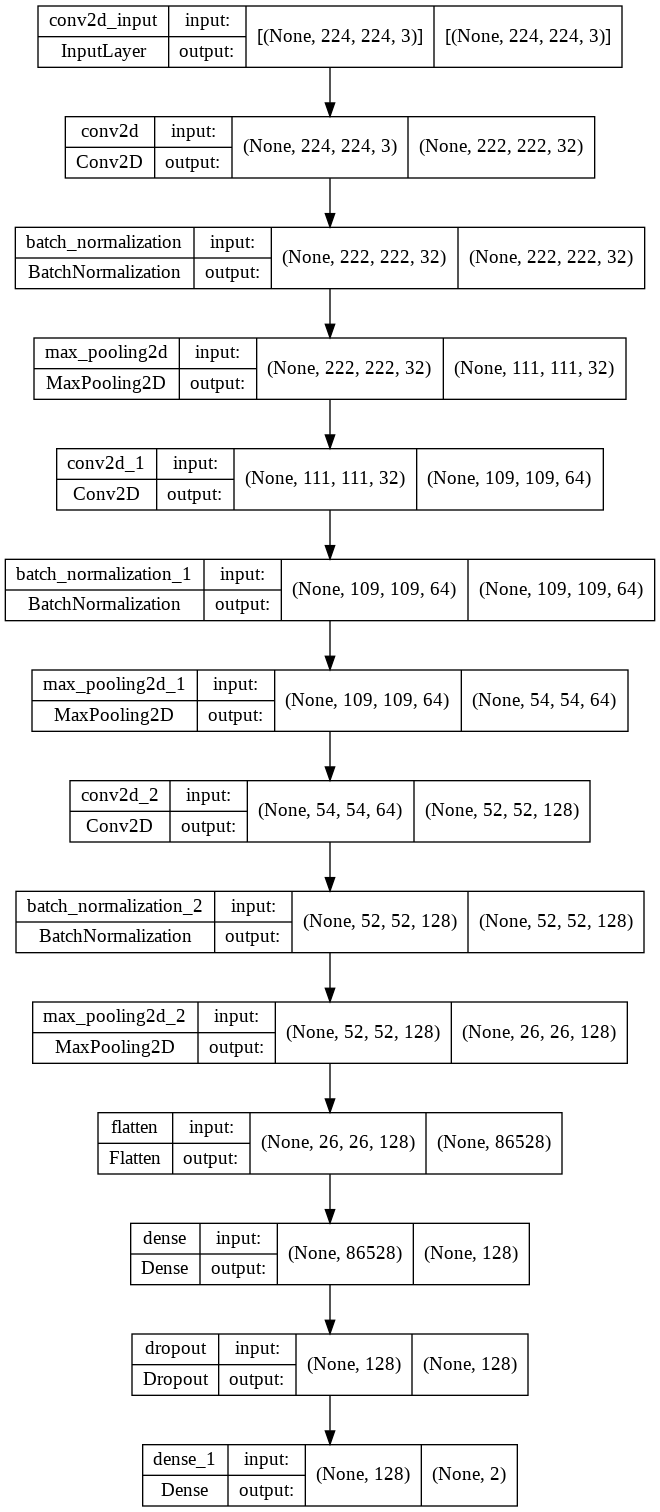

In [ ]:
# Visualize model
plot_model(cnn, to_file = 'cnn_model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# Fit the model
cnn_history = cnn.fit(x_train, y_train_encode, validation_data = (x_val, y_val_encode), epochs = 100, callbacks = callbacks)

Train on 2138 samples, validate on 238 samples
Epoch 1/100
2138/2138 [==============================] - ETA: 0s - loss: 0.8174 - accuracy: 0.6721
Epoch 1: val_loss improved from inf to 0.76974, saving model to best_model.h5
2138/2138 [==============================] - 25s 12ms/sample - loss: 0.8174 - accuracy: 0.6721 - val_loss: 0.7697 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
2138/2138 [==============================] - ETA: 0s - loss: 0.5108 - accuracy: 0.7486
Epoch 2: val_loss improved from 0.76974 to 0.75247, saving model to best_model.h5
2138/2138 [==============================] - 9s 4ms/sample - loss: 0.5108 - accuracy: 0.7486 - val_loss: 0.7525 - val_accuracy: 0.5399 - lr: 1.0000e-04
Epoch 3/100
2138/2138 [==============================] - ETA: 0s - loss: 0.4338 - accuracy: 0.7870
Epoch 3: val_loss improved from 0.75247 to 0.65473, saving model to best_model.h5
2138/2138 [==============================] - 8s 4ms/sample - loss: 0.4338 - accuracy: 0.7870 - val_loss: 0.6

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
cnn.save('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary_pneu/cnn.h5') 

### Model performance 

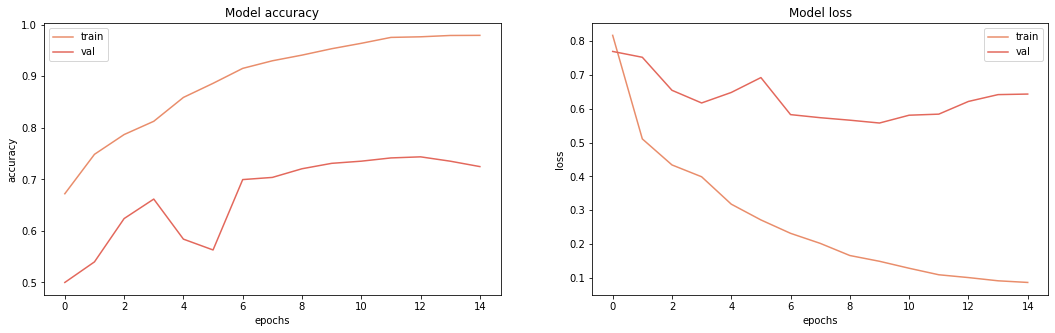

In [ ]:
# Learning Curve with accuracy and loss

figure, axis = plt.subplots(1, 2, figsize=(18,5))
axis = axis.ravel()

for i,element in enumerate(['accuracy', 'loss']):
    axis[i].plot(cnn_history.history[element])
    axis[i].plot(cnn_history.history['val_' + element])
    axis[i].set_title('Model {}'.format(element))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(element)
    axis[i].legend(['train', 'val'])

Train Result:
Accuracy Score: 99.72%
_______________________________________________
CLASSIFICATION REPORT:
             Bacterial        Viral  accuracy    macro avg  weighted avg
precision     1.000000     0.994419  0.997194     0.997209      0.997209
recall        0.994387     1.000000  0.997194     0.997194      0.997194
f1-score      0.997186     0.997201  0.997194     0.997194      0.997194
support    1069.000000  1069.000000  0.997194  2138.000000   2138.000000
_______________________________________________
Confusion Matrix: 
 [[1063    6]
 [   0 1069]]

Test Result:
Accuracy Score: 75.25%
_______________________________________________
CLASSIFICATION REPORT:
            Bacterial       Viral  accuracy   macro avg  weighted avg
precision    0.750000    0.755102  0.752525    0.752551      0.752551
recall       0.757576    0.747475  0.752525    0.752525      0.752525
f1-score     0.753769    0.751269  0.752525    0.752519      0.752519
support    297.000000  297.000000  0.752525 

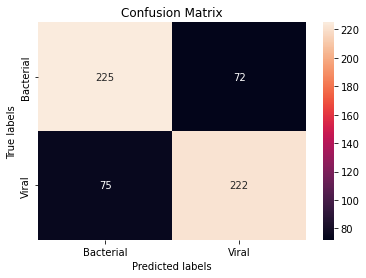

In [ ]:
# Print the score of Training and Testings sets

def print_score(cnn, x_train, y_train_encode, x_test, y_test_encode, train=True):
    if train:
        pred = cnn.predict(x_train)
        pred = np.argmax(pred, axis=1)
        y_train_argmax = np.argmax(y_train_encode, axis=1)
        clf_report = pd.DataFrame(classification_report(y_train_argmax, pred, output_dict=True, target_names = ['Bacterial','Viral']))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_argmax, pred)}\n")
        
    elif train==False:
        pred = cnn.predict(x_test)
        pred = np.argmax(pred, axis=1)
        y_test_argmax = np.argmax(y_test_encode, axis=1)
        cm = confusion_matrix(y_test_argmax, pred)
        clf_report = pd.DataFrame(classification_report(y_test_argmax, pred, output_dict=True, target_names = ['Bacterial','Viral']))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['Bacterial','Viral']); ax.yaxis.set_ticklabels(['Bacterial','Viral'])


print_score(cnn, x_train, y_train_encode, x_test, y_test_encode, train=True)
print_score(cnn, x_train,y_train_encode, x_test, y_test_encode, train=False)

In [ ]:
# Print the score of Validation set

pred = cnn.predict(x_val)
pred = np.argmax(pred, axis=1)
y_val_argmax = np.argmax(y_val_encode, axis=1)
clf_report = pd.DataFrame(classification_report(y_val_argmax, pred, output_dict=True, target_names = ['Bacterial','Viral']))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_val_argmax, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_val_argmax, pred)}\n")

Validation Result:
Accuracy Score: 73.11%
_______________________________________________
CLASSIFICATION REPORT:
            Bacterial       Viral  accuracy   macro avg  weighted avg
precision    0.731092    0.731092  0.731092    0.731092      0.731092
recall       0.731092    0.731092  0.731092    0.731092      0.731092
f1-score     0.731092    0.731092  0.731092    0.731092      0.731092
support    119.000000  119.000000  0.731092  238.000000    238.000000
_______________________________________________
Confusion Matrix: 
 [[87 32]
 [32 87]]



### ROC Curve


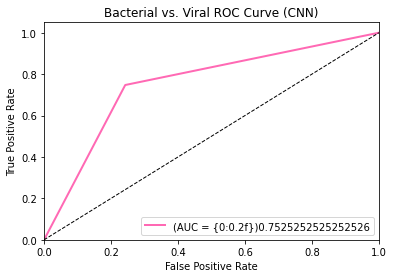

In [ ]:
from sklearn import metrics
y_pred = cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test_encode, axis = 1)
fpr, tpr, _ = metrics.roc_curve(y_test_argmax,  y_pred)
auc = metrics.roc_auc_score(y_test_argmax, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc), lw = 2, color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bacterial vs. Viral ROC Curve (CNN)')
plt.legend(loc="lower right")
plt.show()

### Classification visualization

In [ ]:
predict_prob=cnn.predict(x_test)
predict_classes=np.argmax(predict_prob,axis=1)
y_test_argmax=np.argmax(y_test_encode,axis=1)

In [ ]:
correct = np.nonzero(predict_classes == y_test_argmax)[0]
incorrect = np.nonzero(predict_classes != y_test_argmax)[0]

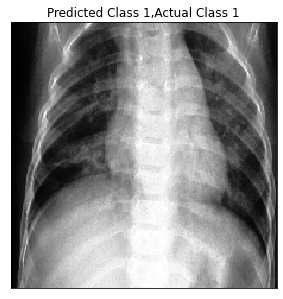

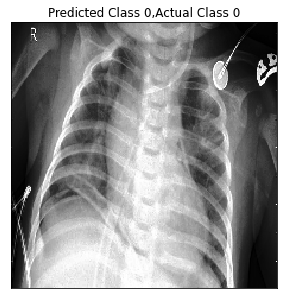

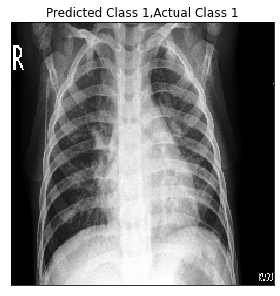

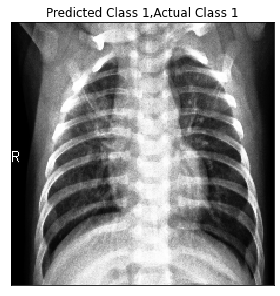

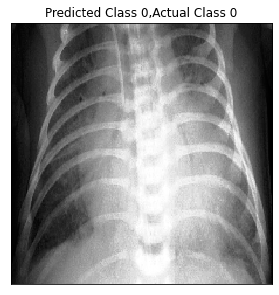

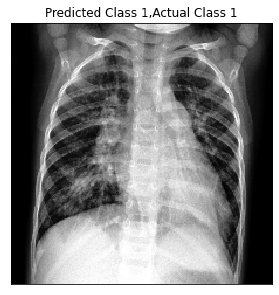

In [ ]:
# Correct classification

i = 0
for c in correct[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size,img_size,nb_channels), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Bacterial
# class 1 = Viral

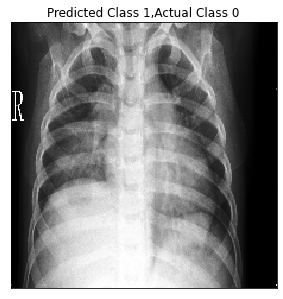

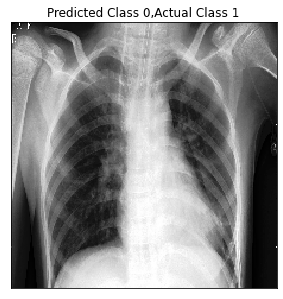

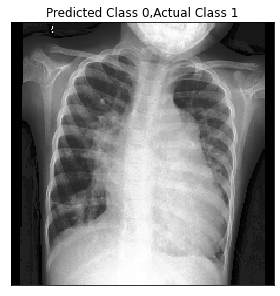

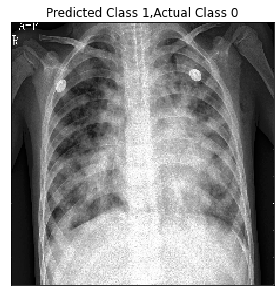

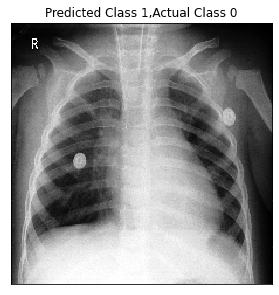

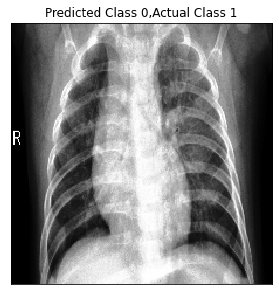

In [ ]:
# Incorrect classification

i = 0
for c in incorrect[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size,img_size,nb_channels), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Bacterial
# class 1 = Viral

## InceptionV3

In [ ]:
# Implement and fine-tune the InceptionV3 model

in_lay = Input(x_train.shape[1:]) 
base_pretrained_model = InceptionV3(input_shape = x_train.shape[1:], include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_features = base_pretrained_model(in_lay)
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

x = GlobalAveragePooling2D()(bn_features)
x = Dense(350,activation='relu')(x)
x = Dropout(0.15)(x) # for better generalization and to avoid overfitting

out_layer = Dense(2, activation='sigmoid')(x) # sigmoid for binary classification

inception_model = Model(inputs = [in_lay], outputs = [out_layer])

# Define parameters
inception_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['accuracy'])

87924736/87910968 [==============================] - 2s 0us/step


In [ ]:
# Train the model
inceptionv3_history = inception_model.fit(x_train, y_train_encode, 
                                  validation_data = (x_val, y_val_encode), 
                                  epochs = 100, 
                                  callbacks = callbacks)

Train on 2138 samples, validate on 238 samples
Epoch 1/100
2138/2138 [==============================] - ETA: 0s - loss: 0.6353 - accuracy: 0.6508
Epoch 1: val_loss did not improve from 0.55784
2138/2138 [==============================] - 12s 6ms/sample - loss: 0.6353 - accuracy: 0.6508 - val_loss: 0.5789 - val_accuracy: 0.6954 - lr: 1.0000e-04
Epoch 2/100
2138/2138 [==============================] - ETA: 0s - loss: 0.5382 - accuracy: 0.7390
Epoch 2: val_loss improved from 0.55784 to 0.55654, saving model to best_model.h5
2138/2138 [==============================] - 8s 4ms/sample - loss: 0.5382 - accuracy: 0.7390 - val_loss: 0.5565 - val_accuracy: 0.7164 - lr: 1.0000e-04
Epoch 3/100
2138/2138 [==============================] - ETA: 0s - loss: 0.4889 - accuracy: 0.7806
Epoch 3: val_loss improved from 0.55654 to 0.54558, saving model to best_model.h5
2138/2138 [==============================] - 7s 3ms/sample - loss: 0.4889 - accuracy: 0.7806 - val_loss: 0.5456 - val_accuracy: 0.7248 - lr:

In [ ]:
# Save the model
inception_model.save('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary_pneu/inception.h5') 

### Model performance 

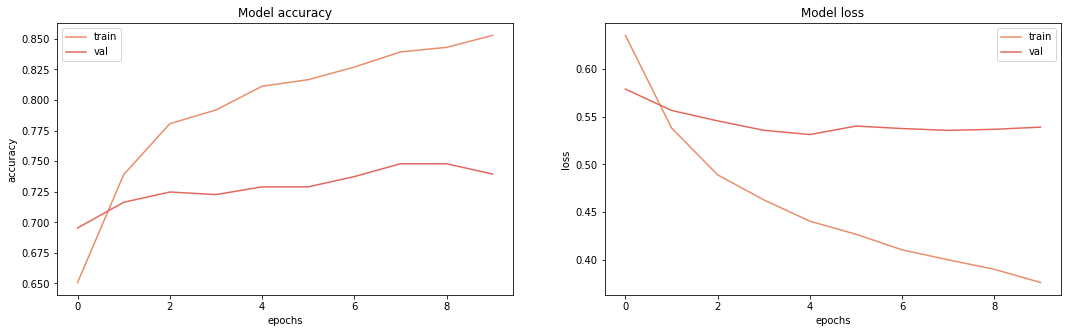

In [ ]:
# Learning Curve with accuracy and loss

figure, axis = plt.subplots(1, 2, figsize=(18,5))
axis = axis.ravel()

for i,element in enumerate(['accuracy', 'loss']):
    axis[i].plot(inceptionv3_history.history[element])
    axis[i].plot(inceptionv3_history.history['val_' + element])
    axis[i].set_title('Model {}'.format(element))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(element)
    axis[i].legend(['train', 'val'])

Train Result:
Accuracy Score: 87.65%
_______________________________________________
CLASSIFICATION REPORT:
            Bacterial       Viral  accuracy   macro avg  weighted avg
precision     0.87652     0.87652   0.87652     0.87652       0.87652
recall        0.87652     0.87652   0.87652     0.87652       0.87652
f1-score      0.87652     0.87652   0.87652     0.87652       0.87652
support    1069.00000  1069.00000   0.87652  2138.00000    2138.00000
_______________________________________________
Confusion Matrix: 
 [[937 132]
 [132 937]]

Test Result:
Accuracy Score: 75.76%
_______________________________________________
CLASSIFICATION REPORT:
            Bacterial       Viral  accuracy   macro avg  weighted avg
precision    0.752475    0.762887  0.757576    0.757681      0.757681
recall       0.767677    0.747475  0.757576    0.757576      0.757576
f1-score     0.760000    0.755102  0.757576    0.757551      0.757551
support    297.000000  297.000000  0.757576  594.000000    594.

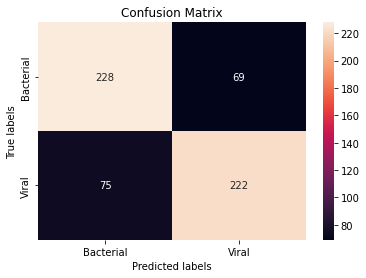

In [ ]:
# Print the score of Training and Testings sets

def print_score(inception_model, x_train, y_train_encode, x_test, y_test_encode, train=True):
    if train:
        pred = inception_model.predict(x_train)
        pred = np.argmax(pred, axis=1)
        y_train_argmax = np.argmax(y_train_encode, axis=1)
        clf_report = pd.DataFrame(classification_report(y_train_argmax, pred, output_dict=True, target_names = ['Bacterial', 'Viral']))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_argmax, pred)}\n")
        
    elif train==False:
        pred = inception_model.predict(x_test)
        pred = np.argmax(pred, axis=1)
        y_test_argmax = np.argmax(y_test_encode, axis=1)
        cm = confusion_matrix(y_test_argmax, pred)
        clf_report = pd.DataFrame(classification_report(y_test_argmax, pred, output_dict=True, target_names = ['Bacterial', 'Viral']))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['Bacterial', 'Viral']); ax.yaxis.set_ticklabels(['Bacterial', 'Viral'])

print_score(inception_model, x_train, y_train_encode, x_test, y_test_encode, train=True)
print_score(inception_model, x_train,y_train_encode, x_test, y_test_encode, train=False)

In [ ]:
# Print the score of Validation set

pred = inception_model.predict(x_val)
pred = np.argmax(pred, axis=1)
y_val_argmax = np.argmax(y_val_encode, axis=1)
clf_report = pd.DataFrame(classification_report(y_val_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_val_argmax, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_val_argmax, pred)}\n")

Validation Result:
Accuracy Score: 73.95%
_______________________________________________
CLASSIFICATION REPORT:
               Normal   Pneumonia  accuracy   macro avg  weighted avg
precision    0.717557    0.766355  0.739496    0.741956      0.741956
recall       0.789916    0.689076  0.739496    0.739496      0.739496
f1-score     0.752000    0.725664  0.739496    0.738832      0.738832
support    119.000000  119.000000  0.739496  238.000000    238.000000
_______________________________________________
Confusion Matrix: 
 [[94 25]
 [37 82]]



### ROC Curve

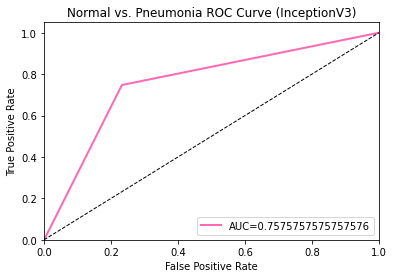

In [ ]:
from sklearn import metrics
y_pred = inception_model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test_encode, axis = 1)
fpr, tpr, _ = metrics.roc_curve(y_test_argmax,  y_pred)
auc = metrics.roc_auc_score(y_test_argmax, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc), lw = 2, color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Normal vs. Pneumonia ROC Curve (InceptionV3)')
plt.legend(loc="lower right")
plt.show()


### Classification visualization

In [ ]:
predict_prob=inception_model.predict(x_test)
predict_classes=np.argmax(predict_prob,axis=1)
y_test_argmax=np.argmax(y_test_encode,axis=1)
correct = np.nonzero(predict_classes == y_test_argmax)[0]
incorrect = np.nonzero(predict_classes != y_test_argmax)[0]


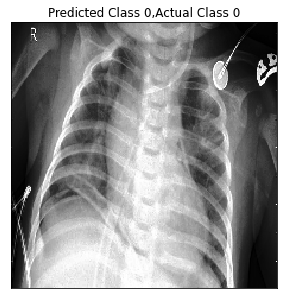

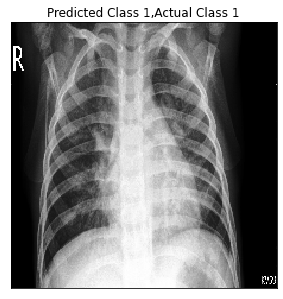

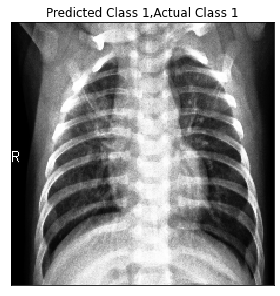

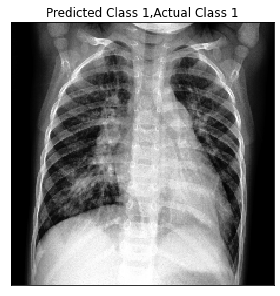

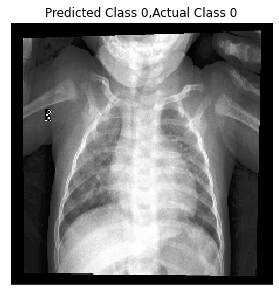

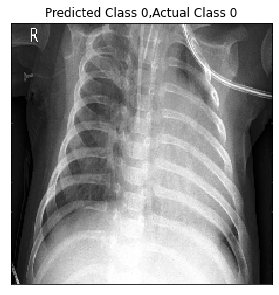

In [ ]:
# Correct classification

i = 0
for c in correct[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size,img_size,nb_channels), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Bacterial
# class 1 = Viral

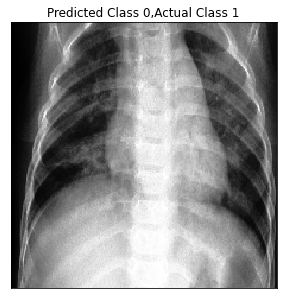

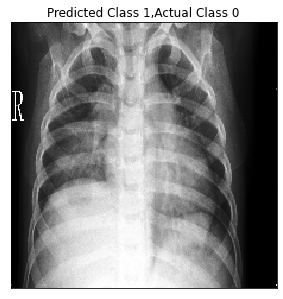

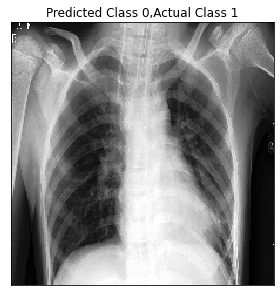

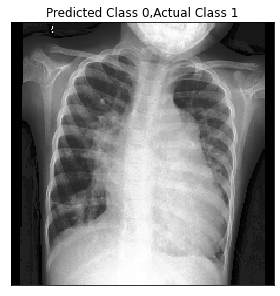

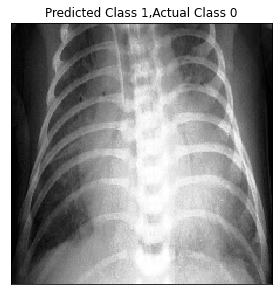

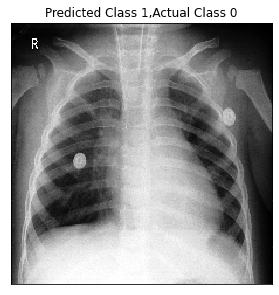

In [ ]:
# Incorrect classification

i = 0
for c in incorrect[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size,img_size,nb_channels), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Bacterial
# class 1 = Viral

# Attention network

## VGG16

In [ ]:
# Implement VGG16 and add attention layers 

in_lay = Input(x_train.shape[1:])
base_pretrained_model = VGG16(input_shape =  x_train.shape[1:], include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_features = base_pretrained_model(in_lay)
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = LocallyConnected2D(1, 
                                kernel_size = (1,1), 
                                padding = 'valid', 
                                activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w]) #linear
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.25)(Dense(1024, activation = 'elu')(gap_dr))
out_layer = Dense(nb_classes, activation = 'sigmoid')(dr_steps) # linear is what 16bit did
attention_vgg16 = Model(inputs = [in_lay], outputs = [out_layer])

# Define parameters
attention_vgg16.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
attention_vgg16.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 7, 7, 512)   2048        ['vgg16[1][0]']                  
 alization)                                                                                       
                                                                                              

In [ ]:
# Fit the model
attention_vgg16_history = attention_vgg16.fit(x_train, y_train_encode, 
                                  validation_data = (x_val, y_val_encode), 
                                  epochs = 100, 
                                  callbacks = callbacks)

Train on 2138 samples, validate on 238 samples
Epoch 1/100
2138/2138 [==============================] - ETA: 0s - loss: 0.6439 - accuracy: 0.6296
Epoch 1: val_loss improved from inf to 0.70109, saving model to best_model.h5
2138/2138 [==============================] - 38s 18ms/sample - loss: 0.6439 - accuracy: 0.6296 - val_loss: 0.7011 - val_accuracy: 0.5042 - lr: 1.0000e-04
Epoch 2/100
2138/2138 [==============================] - ETA: 0s - loss: 0.5794 - accuracy: 0.7116
Epoch 2: val_loss improved from 0.70109 to 0.67732, saving model to best_model.h5
2138/2138 [==============================] - 10s 5ms/sample - loss: 0.5794 - accuracy: 0.7116 - val_loss: 0.6773 - val_accuracy: 0.5399 - lr: 1.0000e-04
Epoch 3/100
2138/2138 [==============================] - ETA: 0s - loss: 0.5634 - accuracy: 0.7196
Epoch 3: val_loss improved from 0.67732 to 0.62326, saving model to best_model.h5
2138/2138 [==============================] - 10s 5ms/sample - loss: 0.5634 - accuracy: 0.7196 - val_loss: 0

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
attention_vgg16.save('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary_pneu/attention_vgg16.h5') 

### Model Performance

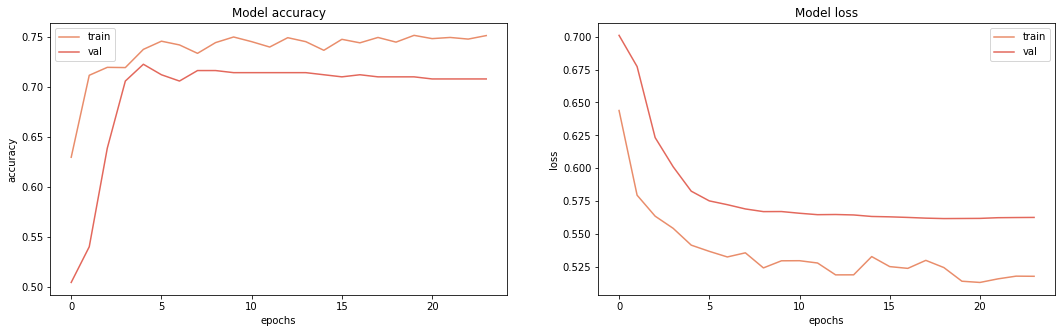

In [ ]:
# Learning curves from accuracy and loss

figure, axis = plt.subplots(1, 2, figsize=(18,5))
axis = axis.ravel()

for i,element in enumerate(['accuracy', 'loss']):
    axis[i].plot(attention_vgg16_history.history[element])
    axis[i].plot(attention_vgg16_history.history['val_' + element])
    axis[i].set_title('Model {}'.format(element))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(element)
    axis[i].legend(['train', 'val'])

Train Result:
Accuracy Score: 77.46%
_______________________________________________
CLASSIFICATION REPORT:
             Bacterial        Viral  accuracy    macro avg  weighted avg
precision     0.768037     0.781400  0.774556     0.774718      0.774718
recall        0.786717     0.762395  0.774556     0.774556      0.774556
f1-score      0.777264     0.771780  0.774556     0.774522      0.774522
support    1069.000000  1069.000000  0.774556  2138.000000   2138.000000
_______________________________________________
Confusion Matrix: 
 [[841 228]
 [254 815]]

Test Result:
Accuracy Score: 77.27%
_______________________________________________
CLASSIFICATION REPORT:
            Bacterial       Viral  accuracy   macro avg  weighted avg
precision    0.766447    0.779310  0.772727    0.772879      0.772879
recall       0.784512    0.760943  0.772727    0.772727      0.772727
f1-score     0.775374    0.770017  0.772727    0.772696      0.772696
support    297.000000  297.000000  0.772727  594

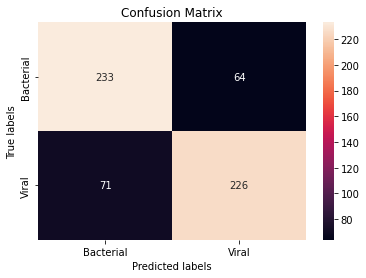

In [ ]:
# Print score of Training and Testing sets

def print_score(attention_vgg16, x_train, y_train_encode, x_test, y_test_encode, train=True):
    if train:
        pred = attention_vgg16.predict(x_train)
        pred = np.argmax(pred, axis=1)
        y_train_argmax = np.argmax(y_train_encode, axis=1)
        clf_report = pd.DataFrame(classification_report(y_train_argmax, pred, output_dict=True, target_names = ['Bacterial', 'Viral']))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_argmax, pred)}\n")
        
    elif train==False:
        pred = attention_vgg16.predict(x_test)
        pred = np.argmax(pred, axis=1)
        y_test_argmax = np.argmax(y_test_encode, axis=1)
        cm = confusion_matrix(y_test_argmax, pred)
        clf_report = pd.DataFrame(classification_report(y_test_argmax, pred, output_dict=True, target_names = ['Bacterial', 'Viral']))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['Bacterial', 'Viral']); ax.yaxis.set_ticklabels(['Bacterial', 'Viral'])

print_score(attention_vgg16, x_train, y_train_encode, x_test, y_test_encode, train=True)
print_score(attention_vgg16, x_train,y_train_encode, x_test, y_test_encode, train=False)

In [ ]:
# Print score of Validation set

pred = attention_vgg16.predict(x_val)
pred = np.argmax(pred, axis=1)
y_val_argmax = np.argmax(y_val_encode, axis=1)
clf_report = pd.DataFrame(classification_report(y_val_argmax, pred, output_dict=True, target_names = ['Bacterial', 'Viral']))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_val_argmax, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_val_argmax, pred)}\n")

Validation Result:
Accuracy Score: 71.01%
_______________________________________________
CLASSIFICATION REPORT:
            Bacterial       Viral  accuracy   macro avg  weighted avg
precision    0.715517    0.704918  0.710084    0.710218      0.710218
recall       0.697479    0.722689  0.710084    0.710084      0.710084
f1-score     0.706383    0.713693  0.710084    0.710038      0.710038
support    119.000000  119.000000  0.710084  238.000000    238.000000
_______________________________________________
Confusion Matrix: 
 [[83 36]
 [33 86]]



### ROC Curve

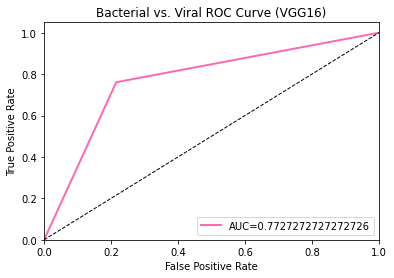

In [ ]:
from sklearn import metrics
y_pred = attention_vgg16.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test_encode, axis = 1)
fpr, tpr, _ = metrics.roc_curve(y_test_argmax,  y_pred)
auc = metrics.roc_auc_score(y_test_argmax, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc), lw = 2, color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bacterial vs. Viral ROC Curve (VGG16)')
plt.legend(loc="lower right")
plt.show()



### Heat map

In [ ]:
predict_prob=attention_vgg16.predict(x_test)
predict_classes=np.argmax(predict_prob,axis=1)
y_test_argmax=np.argmax(y_test_encode,axis=1)

# get the attention layer since it is the only one with a single output dim
for attn_layer in attention_vgg16.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

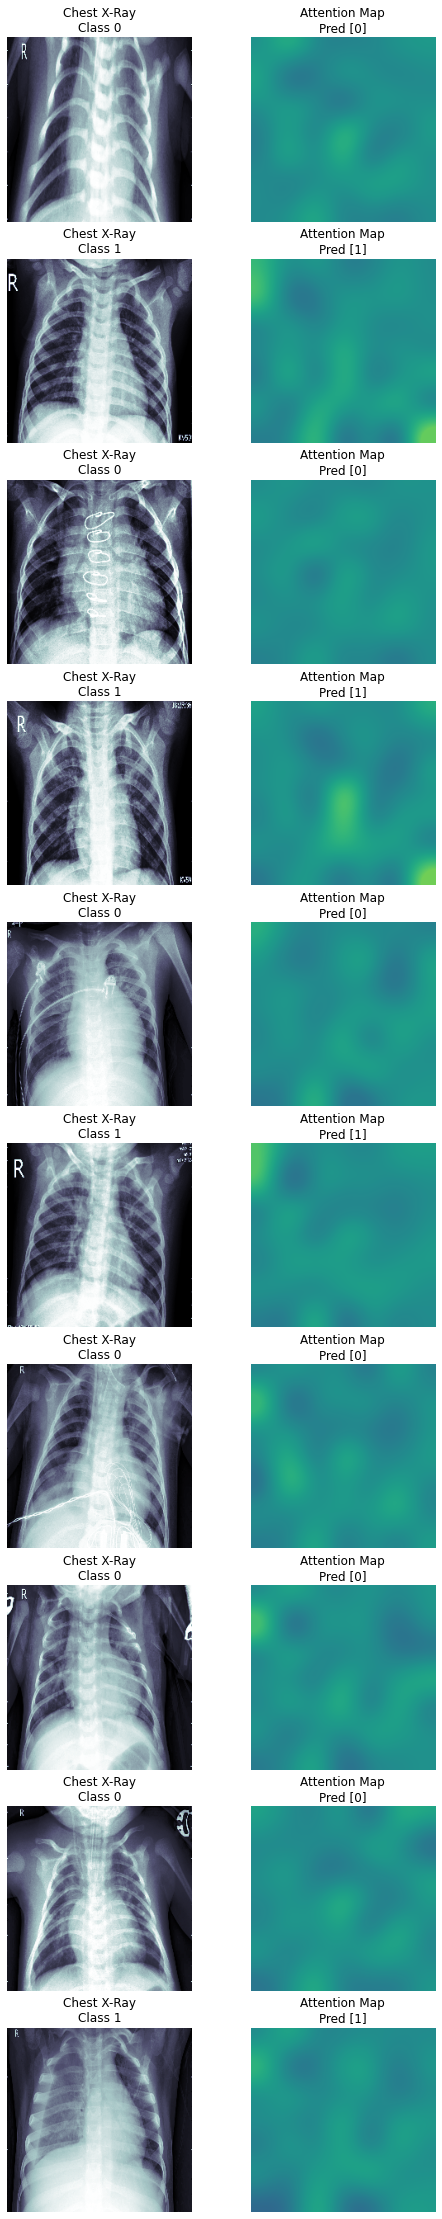

In [ ]:
# Visualize heat maps

import keras.backend as K
rand_idx = np.random.choice(range(len(x_test)), size = 10)
attn_func = K.function(inputs = [base_pretrained_model.get_input_at(0), K.learning_phase()],
           outputs = [attn_layer.get_output_at(0)]
          )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = x_test[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    real_class = y_test_argmax[c_idx]
    img_ax.set_title('Chest X-Ray\nClass {}' .format(real_class))
    pred_class = np.argmax(attention_vgg16.predict(cur_img),axis=1)
    attn_ax.set_title('Attention Map\nPred {}' .format(pred_class))
fig.savefig('attention_map.png', dpi = 300)

# 0 = Bacterial
# 1 = Viral